In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

In [8]:
t = 0;dt = 0.0006; s4 = 0;
chi=0; ci=chi; 
F1=0.7; F2=0.2; F3=0.01; F4=1-F1-F2-F3;
tnow =[]
ixnow = []
mt = [75,175,275,375,475,575,675,775]
data = []

f1=[]
f2=[]
f3=[]
f4=[]


for i in range(1,150000+1):
    t = t + dt
    ni = 0
    if t>4 and t<8:
        ni = 100
        ci = 0.1
    if t>12 and t<17:
        ni = 100
        ci = 0.5
    if t>22 and t<28:
        ni = 100
        ci = 5
    if t>33 and t<39:
        ni = 100
        ci = 10
    if t>46 and t<53:
        ni = 100
        ci =20
    if t>63 and t<70:
        ni = 100
        ci = 30
    if t>76 and t<83:
        ni = 100
        ci = 60
    #if t>730 and t<780:
        #ni = 100
        #ci = 0.001
    #if t>280 and t<310:
        #ni = 100
        #ci = 0
    #if t>310 and t<340:
        #ni = 0
        #ci = 0
    #if t>340 and t<370:
        #ni = 100
        #ci = 0
    #if t>370 and t<400:
        #ni = 0
        #ci = 0
    #if t>400 and t<430:
        #ni = 100
        #ci = chi
    #if t>430 and t<460:
        #ni = 0
        #ci = 0
        
        
    f3n=ni**2.5/(ni**2.5+17**2.5)
    kcon1=0.1
    kcoff1=0.05
    kcon2=20 
    kcoff2=0.3
    kinact=0.2 
    #kinact=1
    #kinact=0.0 
    #kinact=1
    #kinact=0.2
    
    F1=F1+ (F4*ci*kcon1-F1*kcoff1+F2*f3n*kinact-F1*0.3) *dt
    F2=F2+(F3*ci*kcon2-F2*kcoff2+F1*0.15-F2*f3n*kinact)*dt
    F3=F3+(F2*kcoff2+F4*0.1-F3*ci*kcon2-F3*f3n*kinact*25)*dt
    F4=1-F1-F2-F3
    
    f1.append(F1)
    f2.append(F2)
    f3.append(F3)
    f4.append(F4)
    
    incx=F2*f3n
    
    
    
    tnow.append(t)
    ixnow.append(incx)
    
    data.append({'time':t,"current":incx,"f1":F1, 'f2':F2, 'f3':F3,'f4':F4})


In [9]:
import pandas as pd
DF= pd.DataFrame(data)
DF.head()

,current,f1,f2,f3,f4,time
0,0.0,0.699853,0.200027,0.010041,0.090079,0.0006
1,0.0,0.699706,0.200054,0.010083,0.090157,0.0012
2,0.0,0.699559,0.200081,0.010124,0.090236,0.0018
3,0.0,0.699412,0.200108,0.010166,0.090314,0.0024
4,0.0,0.699265,0.200135,0.010207,0.090393,0.0030


In [10]:
DF.to_csv("output/data.csv")

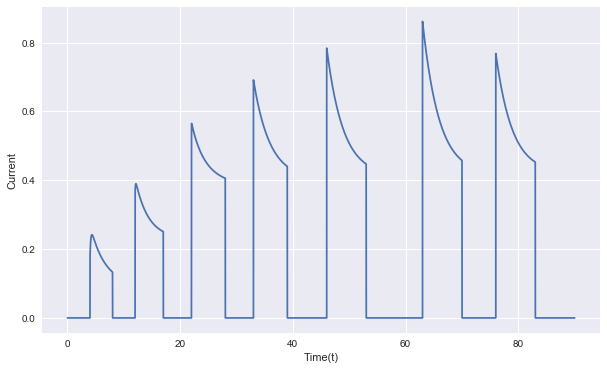

In [11]:
plt.figure(figsize = [10,6])
plt.plot(DF['time'],DF['current'])
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.savefig("plot/current2.png")
plt.savefig("plot/current2.pdf")
plt.show()

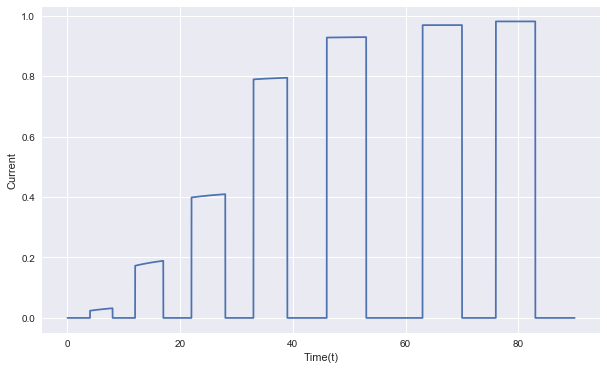

In [47]:
plt.figure(figsize = [10,6])
plt.plot(tnow,ixnow)
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.savefig("plot/current.png")
plt.savefig("plot/current.pdf")
plt.show()

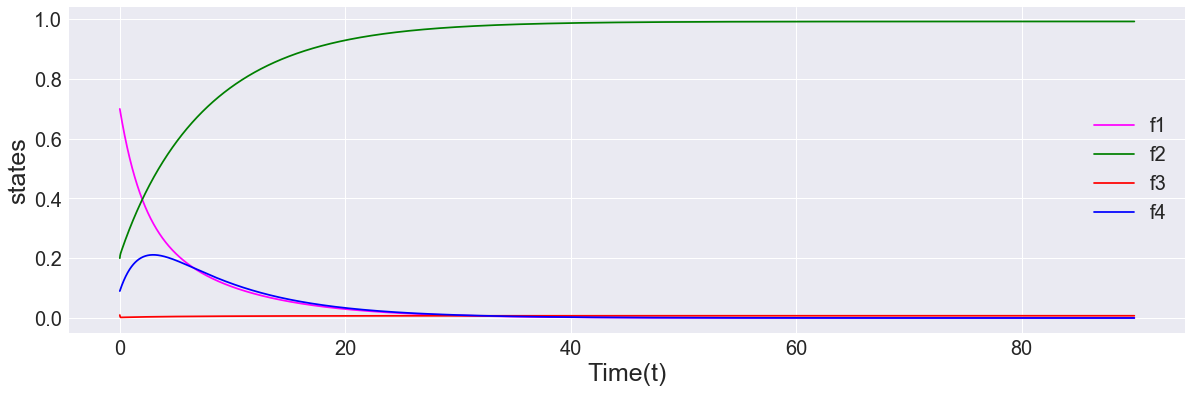

In [48]:
plt.figure(figsize = [20,6])
plt.plot(tnow,f1,label = "f1",color='magenta')
plt.plot(tnow,f2,label = "f2",color='green')
plt.plot(tnow,f3,label = "f3",color='red')
plt.plot(tnow,f4,label = "f4",color='blue')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Time(t)",fontsize=25)
plt.ylabel("states",fontsize=25)
plt.legend(fontsize=20)
plt.savefig('./plot/states.png')
plt.savefig("plot/states.pdf")
plt.show()

### Na-dependent inactivation dictates activation by Ca

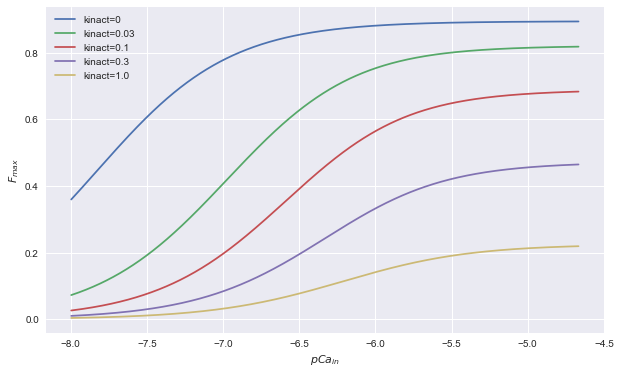

In [49]:
ni = 40
plt.figure(figsize = [10,6])
for kinact in [0, 0.03,0.1,0.3,1.0]:
    cinow = []
    ixnow = []
    for i in range(1,1001):
        
        logci = -(8-(i/300))
        ci = (10**(logci))*1000000
        f3n = (ni**2.5)/((ni**2.5)+(17**2.5))
        kcon1 = 0.1
        kcoff1 = 0.05
        kcon2 = 20
        kcoff2 = 0.3
    
    
        k2 = ci*kcon1
        k1 = kcoff1
        k5 = ci*kcon2
        k6 = kcoff2
        k8 = 0.3
        k7 = f3n*kinact
        k3 = 0.1
        k4 = f3n*kinact*25
    
    
        x1 = k2*k4*(k7+k6)+k5*k7*(k2+k3)
        x2 = k1*k7*(k4+k5)+k4*k6*(k1+k8)
        x3 = k1*k3*(k7+k6)+k8*k6*(k2+k3)
        x4 = k2*k8*(k4+k5)+k3*k5*(k1+k8)
        d = x1+x2+x3+x4
    
        e1 = x1/d
        e2 = x2/d
        e3 = x3/d
        e4 = x4/d
        incx = e4*f3n
        
        cinow.append(logci)
        ixnow.append(incx)
        
    plt.plot(cinow,ixnow,label= "kinact="+str(kinact))
    
plt.xlabel("$pCa_{in}$")
plt.ylabel("$F_{max}$")
plt.legend()
#plt.savefig("plot/inact.png")
#plt.savefig("plot/inact.pdf")
plt.show()